## Feedforward Neural Network from Scratch

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(), # Flatten 28x28 images into a vector
    Dense(128, activation='relu'), # Hidden layer with 128 neurons
    Dense(64, activation='relu'), # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

In [6]:
model.compile(
    optimizer='adam', # Optimizer
    loss='categorical_crossentropy', # Loss function for multi-class classification
    metrics=['accuracy'] # Metrics to monitor during training
)

In [7]:
history = model.fit(x_train, y_train, # Training data and labels
                    epochs=10, # Number of epochs
                    batch_size=32, # Batch size
                    validation_data=(x_test, y_test)) # Validation data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.4318 - val_accuracy: 0.9587 - val_loss: 0.1326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9672 - loss: 0.1084 - val_accuracy: 0.9705 - val_loss: 0.1027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9774 - loss: 0.0715 - val_accuracy: 0.9751 - val_loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9838 - loss: 0.0522 - val_accuracy: 0.9742 - val_loss: 0.0856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0387 - val_accuracy: 0.9702 - val_loss: 0.1005
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0327 - val_accuracy: 0.9756 - val_loss: 0.0905
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 0.9776 - val_loss: 0.0775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9934 - loss: 0.0206 - 

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9721 - loss: 0.1069
Test Loss: 0.0968
Test Accuracy: 97.60%


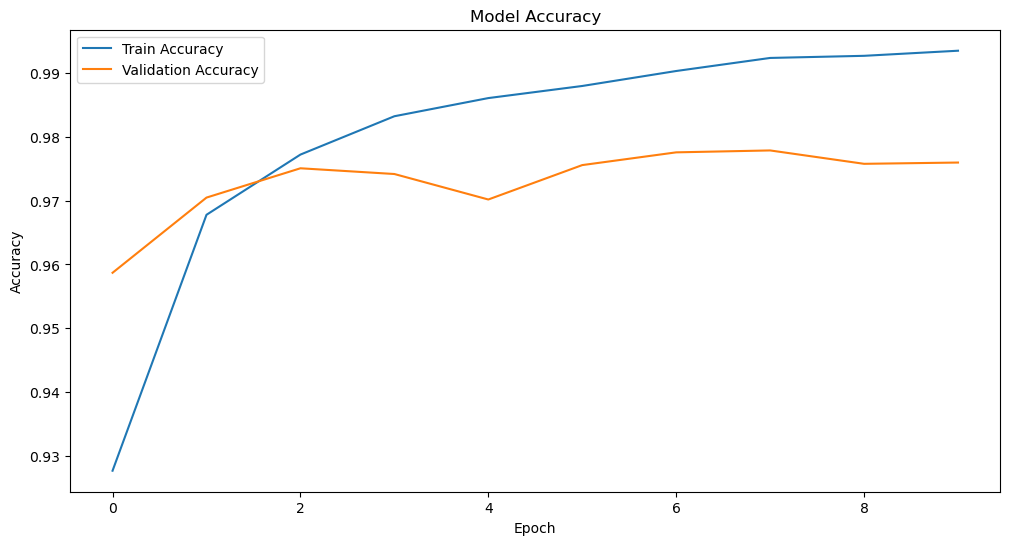

In [11]:
# Visualize training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()